# Refolding Colour Map from global HDX-MS analysis

The m/z spectra from MS analysis containing the ESI charge distribution were smoothed (Savitzky-Golay) in MassLynx and one charged m/z peak (24+) was selected at every timepoint to display the folding pathway. The m/z peak comprises a multimodal distribution during folding and shifts from the unfolded state (highest D-uptake or m/z) to an intermediate state (medium D-uptake or m/z) to the final folded state (minimum D-uptake or m/z). The folding states are visualized using a colour map where the population fractions are displayed with brighter colours.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #2D plotting library
import matplotlib as mpl
import numpy as np # scientific computing with Python (functions)
import peakutils
from matplotlib import gridspec


In [2]:
#dataset of one peak (24+ charged) at different refolding timepoints
data_table = np.genfromtxt('global_PpiB_4C_data.txt').T
data_table.shape

(39, 1691)

In [3]:
#Timepoints (min)
labels = np.array(['60m', '30m', '20m', '15m', '10m', '5m', '1m', '40s', '20s', 't0'])
time = np.array([60, 30, 20, 15, 10, 5, 1, 0.66, 0.33, 0])[::-1]

In [4]:
#Put data into an array and remove background with linear equation
data_raw = [np.stack([data_table[0], data_table[2]/100])] + [np.stack([data_table[(4*i)-1], data_table[(4*i)+1]/100]) for i in np.arange(9) + 1]

data_out = []
for d in data_raw:
    x, y = d
    bl = peakutils.baseline(y, 1)
    y_corr = y-bl

#Normalize the data to 1 with population fractions as output    
    y_corr /= np.trapz(y_corr, x)

    data_out.append([x, y_corr])

f_data = np.array(data_out)[::-1]
f_data.shape

(10, 2, 1691)

Text(0, 0.5, 'population fraction')

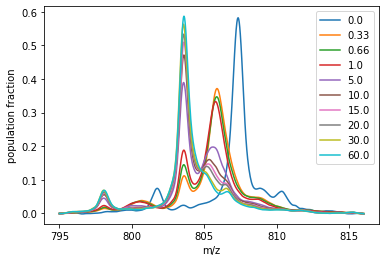

In [5]:
#Visualize the populations fractions at each timepoint
fig, ax = plt.subplots()
for t, (x, y) in zip(time, f_data):
    ax.plot(x, y, label=t)
ax.legend()
ax.set_xlabel ('m/z')
ax.set_ylabel ('population fraction')

In [6]:
# Check if all the x_arrays are identical
xdata = [x for x, y in f_data]
assert all([np.allclose(x1, x2) for x1, x2 in zip(xdata[1:], xdata[:-1])])
x_size = xdata[0].size
x_size

1691

In [7]:
#Fill out the population fractions between the timepoints using linear interpolation
num_timepoints = 4000
t_axis_lin = np.linspace(0, time.max(), num=num_timepoints)

y_data = f_data[:, 1, :]
output = np.empty((num_timepoints, x_size))

for col_idx, y in enumerate(y_data.T):
    output[:, col_idx] = np.interp(t_axis_lin, time, y)

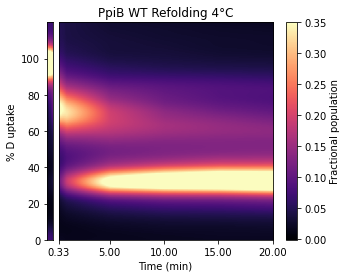

In [9]:
#Create a colourmap using a grid that is divided into two parts with the unfolded state on the right and refolding experiment on the right
sclf=1
fig, (ax,ax2) = plt.subplots(1,2,sharey=True,figsize=(sclf*5, sclf*4))
ax = plt.subplot2grid((1, 40), (0, 0), colspan=1)
ax2 = plt.subplot2grid((1, 50), (0, 2), colspan=99)


#cmap.set_bad(color='#434343')
#ax.set_yscale('log')

im = ax.imshow(output.T, aspect='auto', interpolation='none', cmap='magma', origin='lower', vmax=0.35,
               extent=[0, time.max(), -117.71,247.93])
im = ax2.imshow(output.T, aspect='auto', interpolation='none', cmap='magma', origin='lower', vmax=0.35,
               extent=[0, time.max(), -117.71,247.93])
ax.set_ylabel('% D uptake')
ax2.set_xlabel('Time (min)')
ax2.set_title('PpiB WT Refolding 4°C')
ax.set_ylim(0,120)
ax2.set_ylim(0,120)
fig.colorbar(im, label='Fractional population')
#plt.tight_layout()

ax.set_xlim(0, 0.05)
ax2.set_xlim(0.3,20 )
ax.set_yticks([0,20,40,60,80,100])
ax.set_xticks([])
ax2.set_xticks((0.33,5,10,15,20))
ax2.set_yticks([])



plt.savefig('global_PpiB_4C_colour map.png')


